# Generic EDA for exploring new Datasets

Pandas-based code for small datasets or samples. Performs a generic EDA for structured and semi-structured datasets and provides data exploration visualization. Generates a PDF report with the relevant information, including:

- Dataset name, source and version
- dsfd

---

raul.arrabales@gmail.com - Jun '23

---
More info and updates at:<br> [Raul repo for DataScience Enablement - Generic EDA](https://github.com/raul-arrabales/DataScience_Enablement/blob/main/Generic_EDA.ipynb)

### Dataset Identification

### Libs

In [1]:
# Path manipulation
import os 

# dataset manipulation
import pandas as pd 
import numpy as np

# PDF report generation
from fpdf import FPDF

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Managing dates
from datetime import datetime

In [2]:
# Dataset details, for loading and report
dataset_path = "data/Prolexitim_Jan23_En.csv"
dataset_name = os.path.basename(dataset_path)
dataset_source = dataset_path
dataset_version = "Jan23_En"

# Dataset configuration for loading
dataset_format = "csv"
dataset_hasHeader = 0
dataset_separator = ','

### Misc Config

In [3]:
# Random seed
r_seed = 41

### PDF Report formatting

In [4]:
# Document author
pdf_author = "raul.arrabales"

# Margin
pdf_margin = 10 

# Page width: Width of A4 is 210mm
pdf_width = 210 - 2*pdf_margin

# Cell height
pdf_cell_heigth = 50

In [20]:
# My PDF template
class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        self.set_font('Arial', '', 12)
        self.cell(0, 8, dataset_name + ' EDA', 0, 1, 'C')
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', '', 12)
        self.cell(0, 8, f'Page {self.page_no()}', 0, 0, 'C')
          
# Create empty doc
pdf = PDF()
pdf.add_page()

In [21]:
def duoprint(text, pdf, marker=False, box=False):
    """ Prints the input both in the PDF and output
    - marker: indicates a yellow background and bold font
    - box: indicated a border around text cell
    """
    text_height = 10 # default line height 
    print_border = 0 # no border, by default
    
    if (marker): # Bold and yellow fill
        pdf.set_font('Arial', 'B', 12)
        pdf.set_fill_color(r=248, g=230, b=145)
    else:
        pdf.set_font('Arial', '', 12)
        
    if (box): 
        print_border = 1
        text_height = 14
        pdf.set_font('Arial', 'B', 14)
        
    pdf.cell(w=0, h=text_height, txt=text, border=print_border, ln=1, fill=marker)
    print(text)

In [22]:
def blank_line(pdf, height=8):
    """ Prints an empty line in the PDF. 
    - height: indicated height of blank line
    """
    pdf.ln(height)

### Dataset metadata and dataset loading

In [23]:
if (dataset_format == 'csv'):
    df = pd.read_csv(
        dataset_path,
        header=dataset_hasHeader,
        delimiter=dataset_separator)
else:
    print("Dataset format not supported.")

In [24]:
# Quick peek
df.sample(4)

,Timestamp,TAS20,F1,F2,F3,Gender,Age,Code,Alexithymia,Timestamp (1),...,Depression,BAI,Anxiety,PSS,AN,AP,Text_Card1_en,Text_Card9VH_en,Text_Card11_en,Text_Card13HM_en
583,2021-07-08T21:58:44.858Z,57,21,11,25,1,18,a193974a21cd4dcd1a1ca64cb81ea2cf,NEGATIVE,2021-07-08T22:16:55.227Z,...,NEGATIVE,6.0,NEGATIVE,31.0,19.0,23.0,... A boy who was alone more than with his vio...,... A boy who was alone more than with his vio...,"... In one night, there were several people re...","... A chaos had happened, crumbling mountains,..."
720,2021-10-24T20:35:27.491Z,61,24,19,18,1,18,7c2d4a539b7d771671ef745f6558fa4c,POSITIVE,2021-10-24T21:29:34.994Z,...,POSITIVE,43.0,POSITIVE,52.0,NaN,NaN,Once upon a time there was a child who had a d...,"A group of friends lived in a town, there were...",I can't make out anything from the picture so ...,There was a man who was very drunk and a woman...
622,2021-08-05T11:12:28.375Z,80,32,24,24,2,18,ca73be8cd6c055f46c9ecae5a6be143b,POSITIVE,2021-08-05T11:25:58.736Z,...,POSITIVE,40.0,POSITIVE,43.0,23.0,34.0,... a boy who was going through difficult time...,... men of bens tiveram have to leave their fa...,... a path where many people were able to refl...,... a married couple more than we were committ...
462,2021-05-20T18:28:49.242Z,74,29,20,25,2,22,f866c85482684bd8c860cc47253fd90d,POSITIVE,2021-05-20T18:50:11.709Z,...,UNKNOWN,NaN,UNKNOWN,NaN,NaN,NaN,is a boy who has trouble finding inspiration t...,they are exhausted black slaves sleeping on th...,It is a path on a mountain that leads to a wat...,he is an exhausted doctor trying to cure a sic...


In [25]:
duoprint("EDA for dataset: " + dataset_name, pdf, box=True)
duoprint("Dataset version: " + dataset_version + ". Last file modification: " + 
         str(datetime.fromtimestamp(os.path.getmtime(dataset_path))), pdf)
duoprint("Report Generated: " + datetime.now().strftime("%d/%m/%Y %H:%M:%S"), pdf)
duoprint("By: " + pdf_author, pdf)
duoprint("From: " + dataset_source, pdf)

EDA for dataset: Prolexitim_Jan23_En.csv
Dataset version: Jan23_En. Last file modification: 2023-06-01 14:47:29.305594
Report Generated: 02/06/2023 15:21:53
By: raul.arrabales
From: data/Prolexitim_Jan23_En.csv


### Ad Hoc dataset fixing
Based on problems discovered during EDA

In [26]:
# Prolexitim Dataset 
# Data Quality Problem 1 - Column age with a date value
# Age column was loaded as object and it shoud be int
# The affected row is dropped and type converted to int. 
if (dataset_path == "data/Prolexitim_Jan23_En.csv"):
    print("Fixing Age column for Prolexitim dataset")
    df = df.drop(df[df['Age'] == "2021-05-23T00:00:00.000Z"].index)
    df['Age'] = df['Age'].astype(str).astype(int)

Fixing Age column for Prolexitim dataset


### Basic Dataset exploration

In [27]:
# Dataset size
blank_line(pdf)
pdf.set_font('Arial', 'B', 12)
pdf.cell(w=0, h=10, txt="Dataset Dimensions", border=1, ln=1)

n_rows = len(df)
row_info = "Number of rows: " + str(n_rows)
print(row_info)
pdf.set_font('Arial', '', 12)
pdf.cell(w=0, h=8, txt=row_info, border=0, ln=1)

n_cols = df.shape[1]
col_info = "Number of columns: " + str(n_cols)
print(col_info)
pdf.cell(w=0, h=8, txt=col_info, border=0, ln=1)


Number of rows: 1010
Number of columns: 36


Column: Timestamp
Column Type: object
Sample value: 2021-03-17T06:55:09.874Z
Number of unique values: 1010
Percentage of unique values: 100.00%
---
Column: TAS20
Column Type: int64
Sample value: 71
Number of unique values: 65
Percentage of unique values: 6.44%
Generating histogram...
Column TAS20 values frequency:


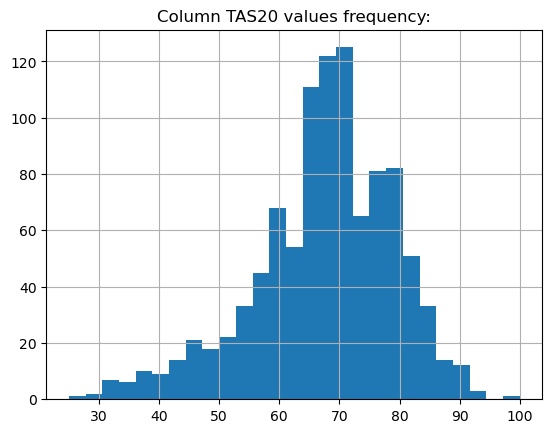

---
Column: F1
Column Type: int64
Sample value: 30
Number of unique values: 29
Percentage of unique values: 2.87%
Generating histogram...
Column F1 values frequency:


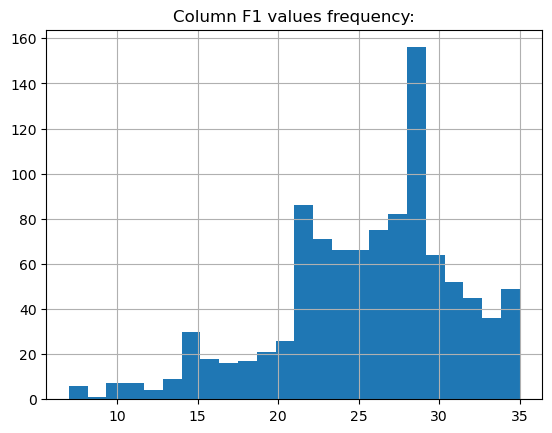

---
Column: F2
Column Type: int64
Sample value: 21
Number of unique values: 21
Percentage of unique values: 2.08%
Generating histogram...
Column F2 values frequency:


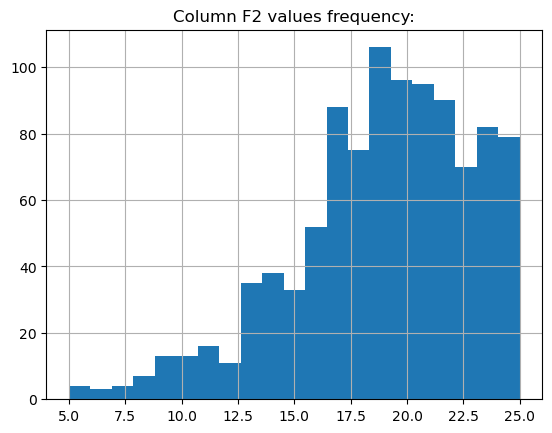

---
Column: F3
Column Type: int64
Sample value: 20
Number of unique values: 31
Percentage of unique values: 3.07%
Generating histogram...
Column F3 values frequency:


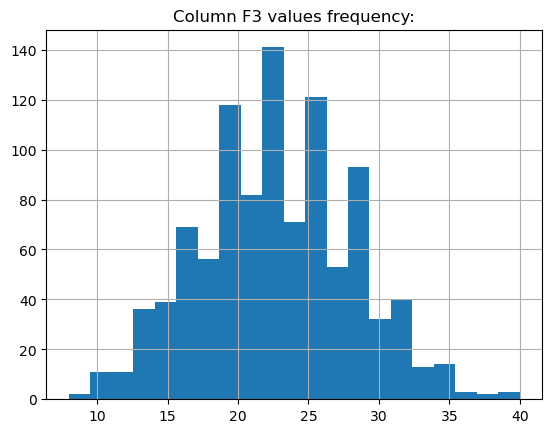

---
Column: Gender
Column Type: int64
Sample value: 2
Number of unique values: 3
Percentage of unique values: 0.30%
Generating histogram...
Column Gender values frequency:


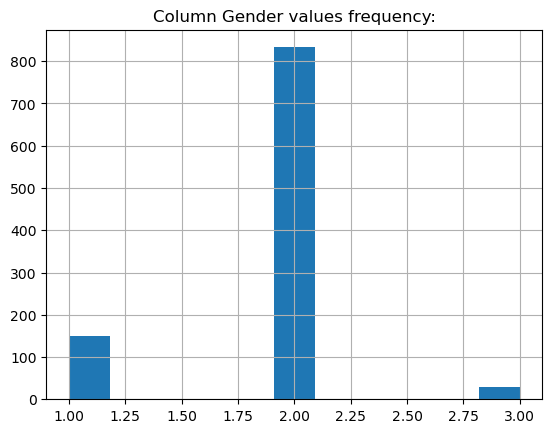

---
Column: Age
Column Type: int64
Sample value: 20
Number of unique values: 45
Percentage of unique values: 4.46%
Generating histogram...
Column Age values frequency:


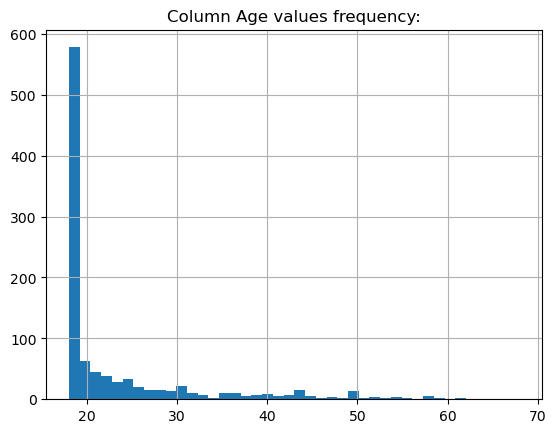

---
Column: Code
Column Type: object
Sample value: 8b45a0f1b5fad1e453f0ac5ccb905fa7
Number of unique values: 947
Percentage of unique values: 93.76%
---
Column: Alexithymia
Column Type: object
Sample value: POSITIVE
Number of unique values: 2
Percentage of unique values: 0.20%
---
Column: Timestamp (1)
Column Type: object
Sample value: 2021-03-17T07:39:24.457Z
Number of unique values: 947
Percentage of unique values: 93.76%
---
Column: DateDiff_TAS20_NLP
Column Type: int64
Sample value: 0
Number of unique values: 43
Percentage of unique values: 4.26%
Generating histogram...
Column DateDiff_TAS20_NLP values frequency:


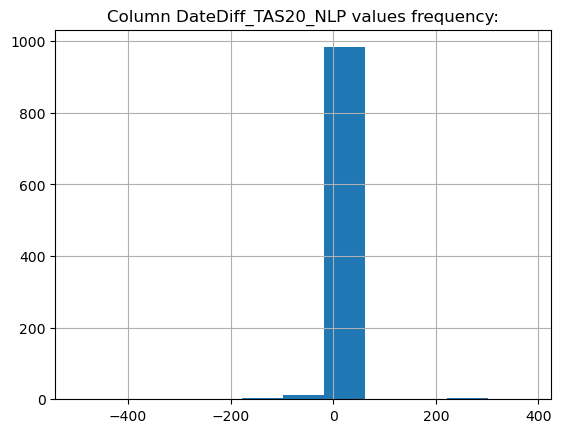

---
Column: Text_Card1
Column Type: object
Sample value:  ... un niño, común, como cualquier otro, salía de casa, iba a la escuela, tenía amigos, su familia lo amaba, no tenía nada que envidiar a nadie, sin embargo, no era feliz, y mucho menos se sentía libre, su sueño se hallaba frente a él, y aunque todo el mundo le decía que podía hacerlo, él no se sentía capaz de hacerlo, por lo cuál, se conformaba con hacer lo que los demás le decían, y aunque por momentos tomara ese violín y se sentía en el paraíso, no lograba permanecer ahí mucho tiempo, pues la realidad siempre lo alcanzaba y lo hacía regresar a esa vida, a la que todo el mundo le decía que estaba destinado.

Number of unique values: 945
Percentage of unique values: 93.56%
---
Column: Text_Card9VH
Column Type: object
Sample value:  ... un hombre que estaba borracho con sus amigos

Number of unique values: 947
Percentage of unique values: 93.76%
---
Column: Text_Card11
Column Type: object
Sample value:  ... un sendero mágico, ca

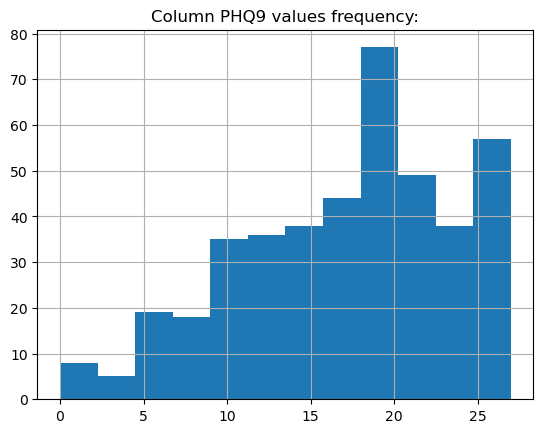

---
Column: I1
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I1 values frequency:


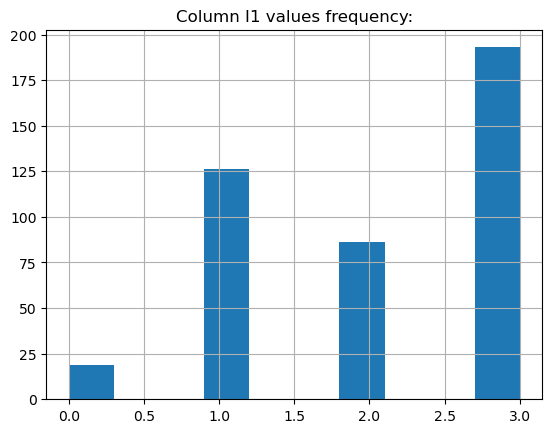

---
Column: I2
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I2 values frequency:


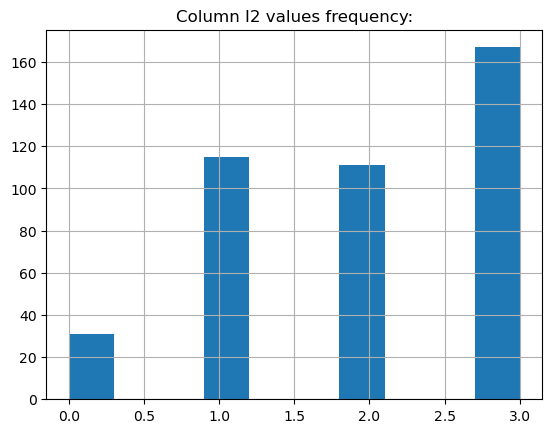

---
Column: I3
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I3 values frequency:


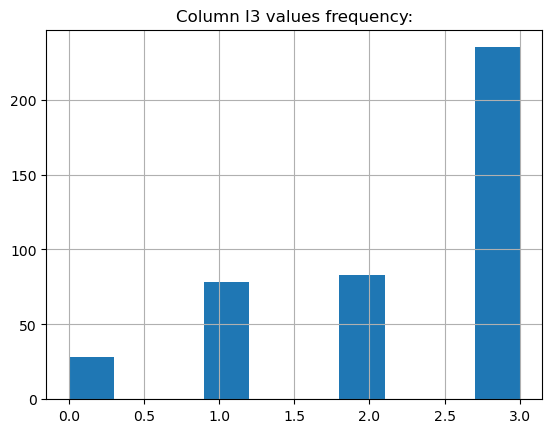

---
Column: I4
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I4 values frequency:


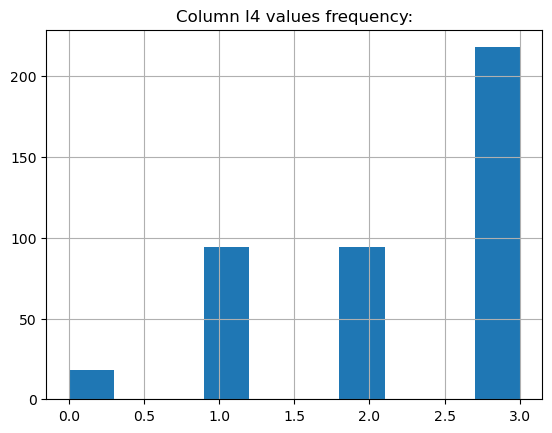

---
Column: I5
Column Type: float64
Sample value: 2.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I5 values frequency:


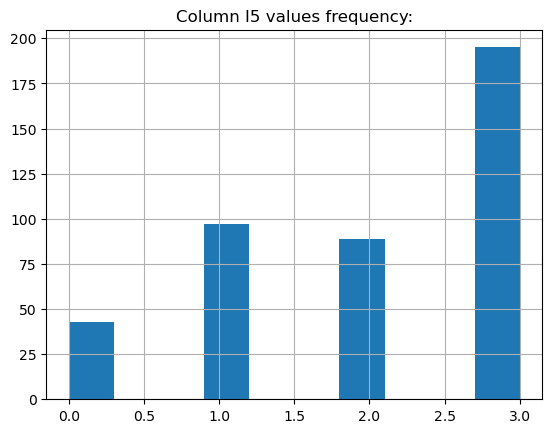

---
Column: I6
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I6 values frequency:


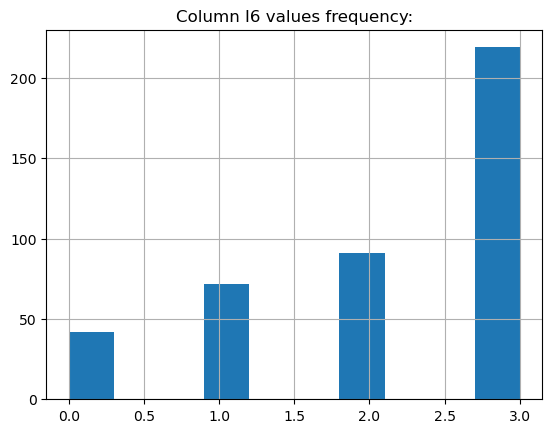

---
Column: I7
Column Type: float64
Sample value: 3.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I7 values frequency:


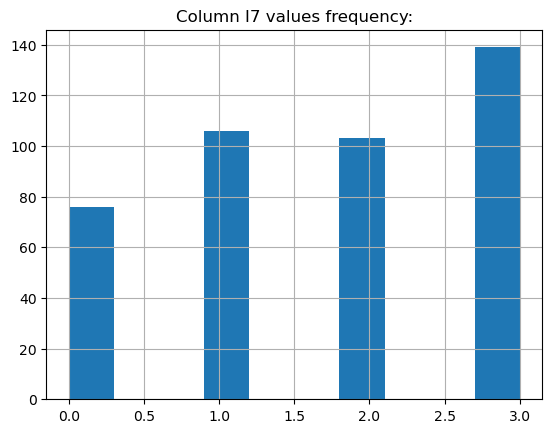

---
Column: I8
Column Type: float64
Sample value: 1.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I8 values frequency:


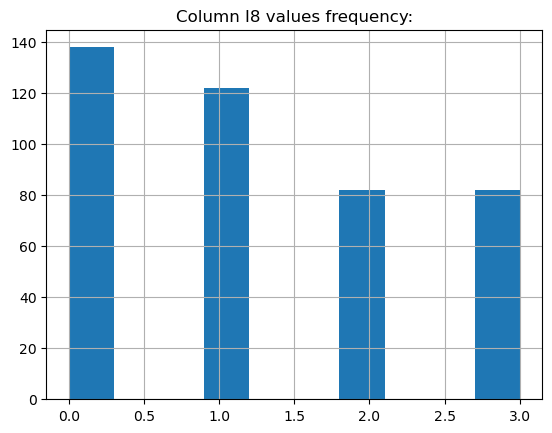

---
Column: I9
Column Type: float64
Sample value: 0.0
Number of unique values: 5
Percentage of unique values: 0.50%
Generating histogram...
Column I9 values frequency:


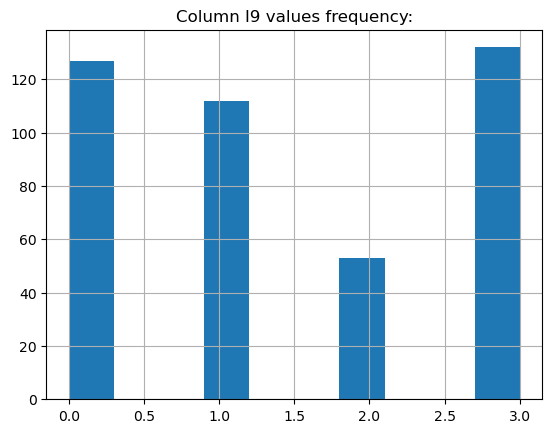

---
Column: Depression
Column Type: object
Sample value: POSITIVE
Number of unique values: 3
Percentage of unique values: 0.30%
---
Column: BAI
Column Type: float64
Sample value: 19.0
Number of unique values: 61
Percentage of unique values: 6.04%
Generating histogram...
Column BAI values frequency:


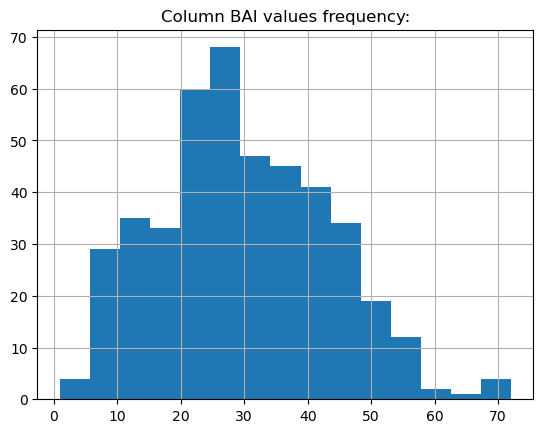

---
Column: Anxiety
Column Type: object
Sample value: POSITIVE
Number of unique values: 3
Percentage of unique values: 0.30%
---
Column: PSS
Column Type: float64
Sample value: 41.0
Number of unique values: 44
Percentage of unique values: 4.36%
Generating histogram...
Column PSS values frequency:


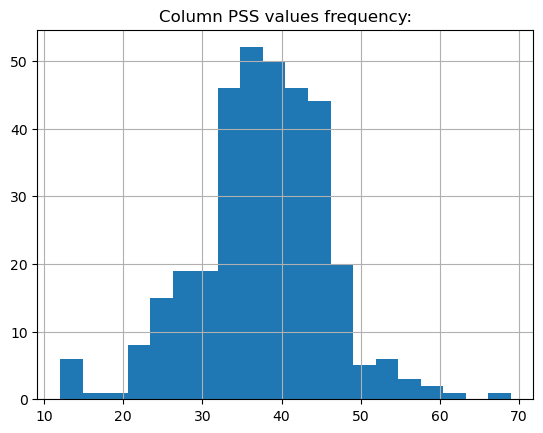

---
Column: AN
Column Type: float64
Sample value: 37.0
Number of unique values: 42
Percentage of unique values: 4.16%
Generating histogram...
Column AN values frequency:


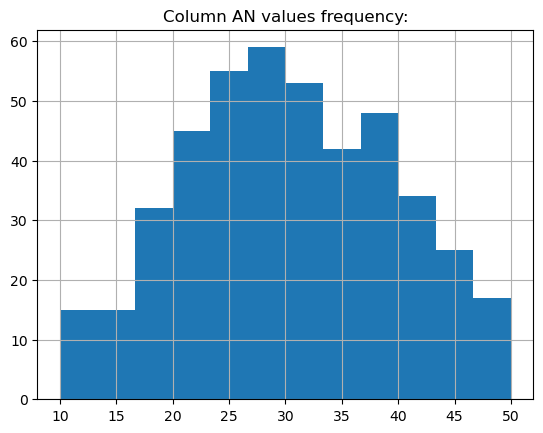

---
Column: AP
Column Type: float64
Sample value: 14.0
Number of unique values: 35
Percentage of unique values: 3.47%
Generating histogram...
Column AP values frequency:


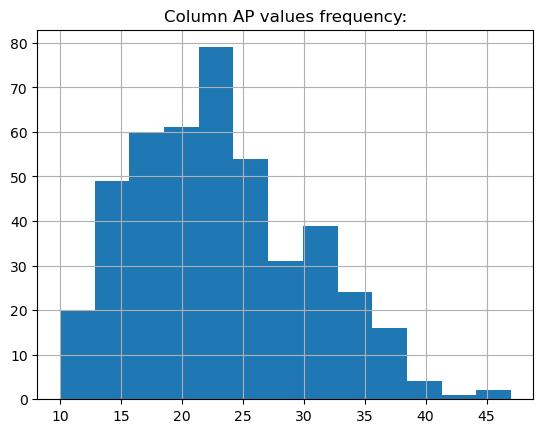

---
Column: Text_Card1_en
Column Type: object
Sample value: ... a common child, like any other, left home, went to school, had friends, his family loved him, he had nothing to envy anyone, however, he was not happy, let alone felt free , his dream was in front of him, and although everyone told him that he could do it, he did not feel capable of doing it, for which, he was content to do what others told him, and although at times he took that violin and he felt in paradise, he could not stay there for long, because reality always caught up with him and made him return to that life, to which everyone told him he was destined.
Number of unique values: 943
Percentage of unique values: 93.37%
---
Column: Text_Card9VH_en
Column Type: object
Sample value: ... a man who was drunk with his friends
Number of unique values: 947
Percentage of unique values: 93.76%
---
Column: Text_Card11_en
Column Type: object
Sample value: ... a magical path, capable of leading you to your deepest desire, no mat

<Figure size 640x480 with 0 Axes>

In [28]:
pdf.set_font('Arial', 'B', 12)
pdf.cell(w=0, h=10, txt="   ", border=0, ln=1)
pdf.cell(w=0, h=10, txt="Dataset Contents", border=1, ln=1)

for c in df.columns: 
    blank_line(pdf)
    
    col_name = "Column: " + c
    duoprint(col_name, pdf, marker=True)
    
    type_info = "Column Type: " + str(df[c].dtype)
    duoprint(type_info, pdf)
        
    sample_info = "Sample value: " + str(df[c].sample(n=1, ignore_index=True, random_state=r_seed).iloc[-1])
    duoprint(sample_info, pdf)
    
    num_unique = len(df[c].unique())
    num_unique_info = "Number of unique values: " + str(num_unique)
    duoprint(num_unique_info, pdf)
    
    pct_unique = (num_unique/n_rows)*100
    pct_unique_info = f'Percentage of unique values: {pct_unique:.2f}%'
    duoprint(pct_unique_info, pdf)
    
    # biufc: b bool, i int (signed), u unsigned int, f float, c complex
    if (df[c].dtype.kind in 'biufc'): 
        print("Generating histogram...")
        hist_info = "Column " + c + " values frequency:"
        hist = df[c].hist(bins='auto')
        hist_img = './imgs/hist_'+c+'.png'
        duoprint(hist_info, pdf)
        plt.title(hist_info)
        plt.savefig(hist_img, transparent=False, facecolor='white', bbox_inches="tight")        
        plt.show()
        plt.clf()
        pdf.image(hist_img, x = 10, y = None, w = 100, h = 0, type = 'PNG')
    
    print("---")
    # input("Press any key")

In [29]:
pdf.output(f'./EDA_report.pdf', 'F')

''

### Data Quality check

#### Label quality check (for supervised learning)

### Correlational Analysis